# MATH&ML-8. Алгоритмы на основе деревьев решений

## 1. Введение

✍ Настало время поговорить о деревьях. Но не о тех, что растут в лесу, а об алгоритме машинного обучения под названием дерево решений (decision tree).

Саму модель дерева решений мы уже использовали, решая множество различных задач машинного обучения: от определения наличия диабета у пациента до предсказания длительности поездок на такси. Но задавались ли вы вопросом, как работает эта модель с точки зрения математики? Настало время это выяснить.

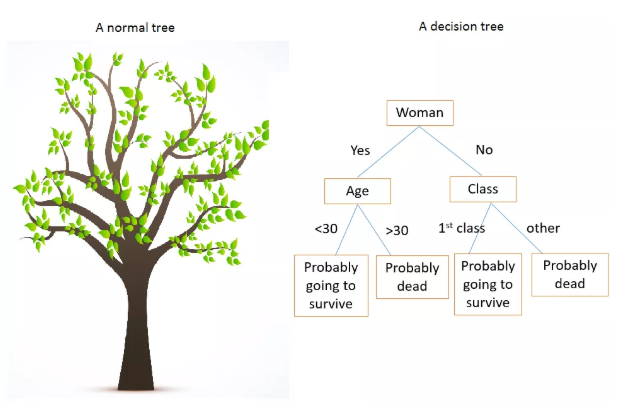

В этом модуле мы:

- разберёмся с математической «магией», которая скрывается за алгоритмом построения дерева решений;
- узнаем, как деревья работают в задачах обучения с учителем;
- своими руками реализуем алгоритм построения дерева решений.

Для того чтобы познакомиться с деревьями решений, нам очень понадобятся знания, полученные в модулях по математическому анализу и теории вероятностей, так как древовидные модели используют именно этот математический аппарат. Поэтому давайте повторим пройденный материал, выполнив небольшое тестирование ↓

⭐ Поздравляем — вы справились с вопросами по пройденному материалу, а значит мы можем начать исследовать деревья от корней до самых листьев.

Если у вас возникли трудности с прохождением входного тестирования, рекомендуем вам заглянуть в модули MATH&ML (4-7) и ещё раз изучить основы математического анализа и теории вероятностей, в частности — повторить работу со множествами, понятие функции, исследование функций, а также определение вероятности, условной вероятности и основные типы распределений.

Для начала по традиции поставим себе **цели на модуль**:

- изучить основную терминологию деревьев решений, их область применения, преимущества и недостатки;
- понять принцип решения задач классификации и регрессии с помощью деревьев решений;
- рассмотреть алгоритм построения деревьев решения CART;
- изучить понятия неоднородности и критерия информативности;
- рассмотреть критерии остановки ветвления дерева и научиться с их помощью управлять сложностью модели;
- научиться осмысленно решать задачи регрессии и классификации с помощью деревьев решений и алгоритмов, основанных на них.

Итак, начнём наше погружение в «дендрологию машинного обучения» →

# 2. Деревья решений в контексте задач классификации и регрессии

✍ С общими представлениями о модели дерева решений мы знакомились, когда изучали задачу классификации (ML-3. Обучение с учителем: классификация). Это неслучайно, ведь изначально деревья решений создавались именно для решения этой задачи. Чуть позднее оказалось, что алгоритм может быть запросто адаптирован и для решения задач регрессии.

В этом модуле мы будем рассматривать деревья решений параллельно в контексте задач классификации и регрессии. Демонстрация работы алгоритма на обеих задачах позволит нам посмотреть на картину в целом и наглядно покажет сходства и различия моделей. Забегая вперёд, скажем, что алгоритмы построения дерева решений для задач классификации и регрессии отличаются лишь в паре шагов.

Для начала мы посмотрим, что вообще представляет собой обученное дерево решений, и заодно закрепим «древесную» терминологию, с которой знакомились ранее, — она будет нас сопровождать на протяжении всего модуля.

Так как мы находимся в разделе MATH&ML, то и говорить будем на строгом математическом языке, но при этом будем сопровождать свои рассуждения переводом на «человеческий».

Начнём с постановки задачи машинного обучения — для этого рассмотрим конкретный пример, а затем обобщим его с помощью математического аппарата.

У нас есть набор из 500 объектов, которые описываются пятью какими-то характеристиками. Например, это могут быть 500 пациентов, у которых измерили пять медицинских параметров: вес, рост, давление, количество лейкоцитов в крови и уровень сахара.

В паре с объектом всегда идёт целевая переменная, которую необходимо научиться предсказывать. Например, целевой переменной может быть признак болезни: 1 — болен диабетом, 0 — не болен диабетом.

Наша цель — построить модель машинного обучения, которая на основе характеристик объекта предсказывает целевую переменную. Для нашего примера это будет модель, которая на основе медицинских параметров выдаёт свой прогноз о наличии у пациента диабета.

Это была классическая постановка задачи машинного обучения в свободной форме. Давайте теперь посмотрим, как будет выглядеть та же самая задача на языке математики.

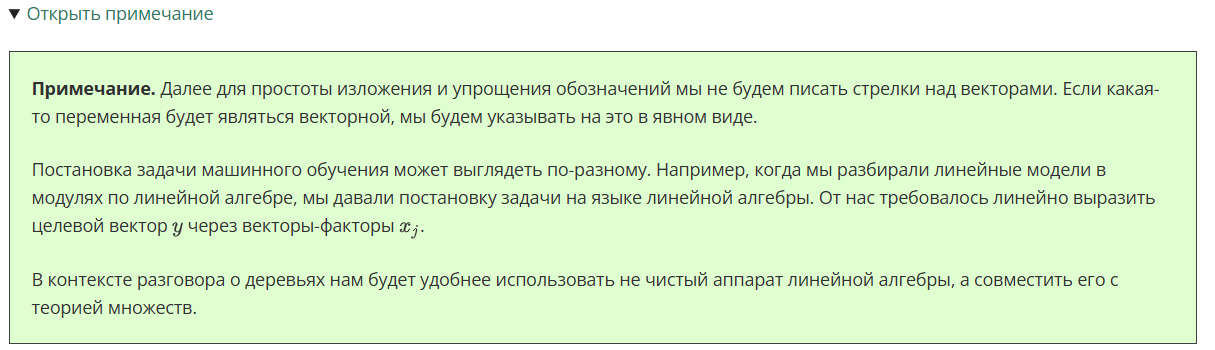

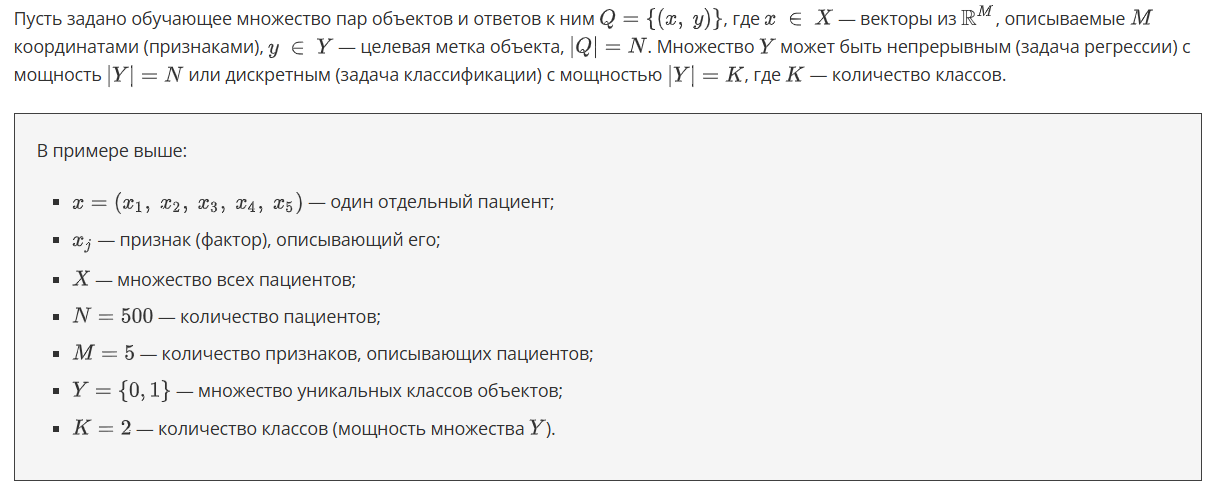

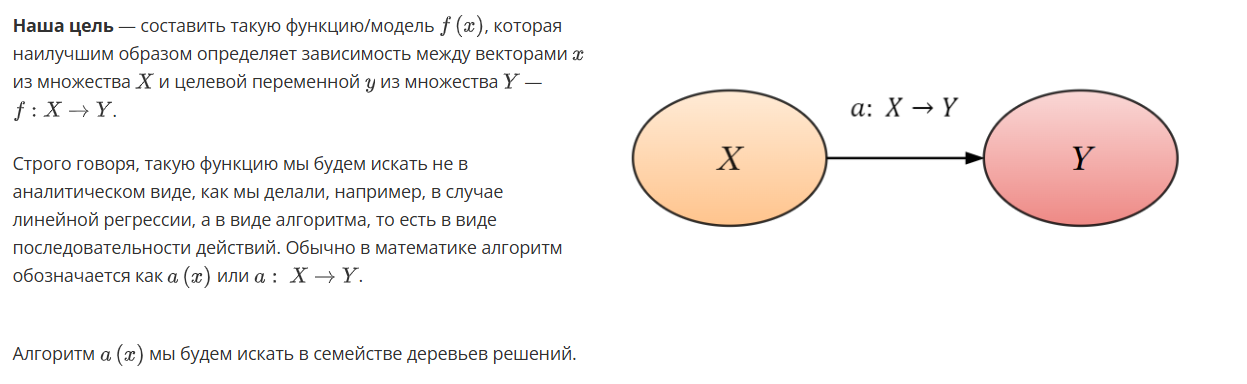

### ОПРЕДЕЛЕНИЕ РЕШАЮЩЕГО ДЕРЕВА

> Если говорить простыми словами, **обученное дерево решений** — это последовательность вопросов, которые задаются поступающим на его вход объектам.

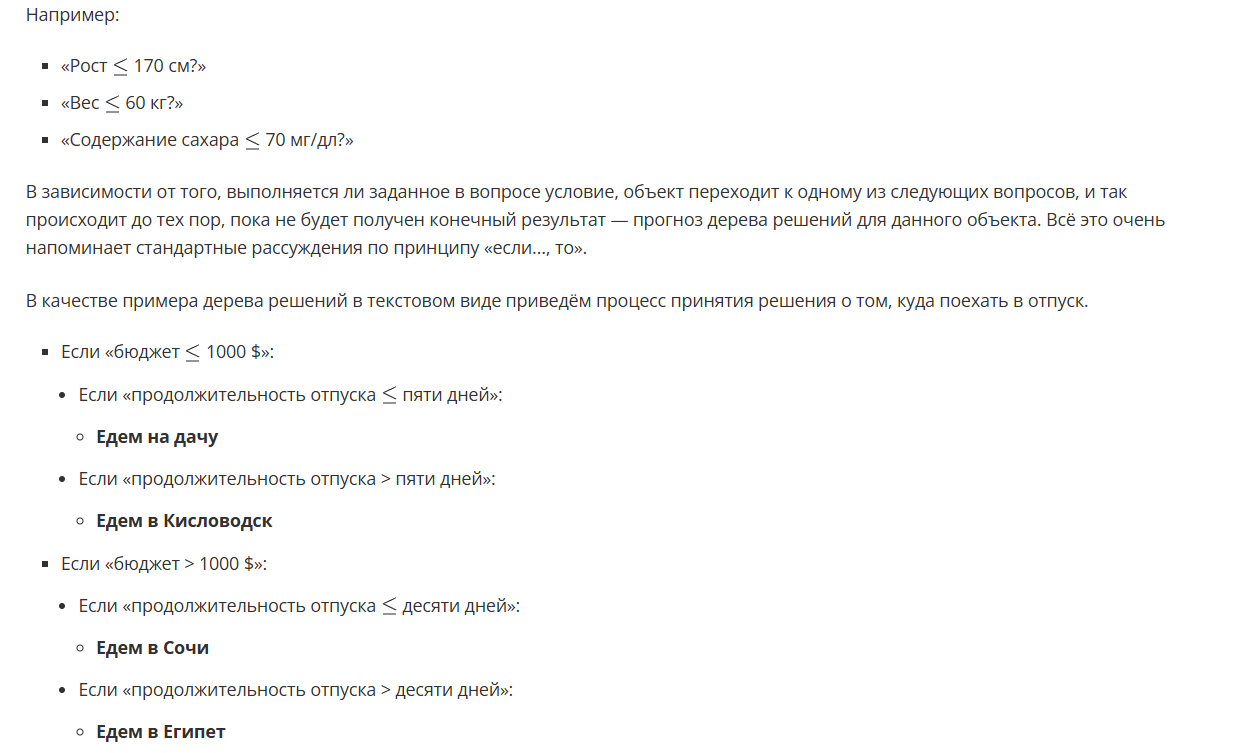

Последовательность вопросов можно оформить в виде вершин графа, структура которого будет напоминать перевёрнутое дерево.

Пройдя путь, который зависит от характеристик объекта, через последовательность от первого вопроса (корня дерева) до финального ответа (листа) мы можем определить значение целевой переменной. В задаче регрессии финальный ответ дерева — некоторое число, а в задаче классификации — класс объекта.